In [2]:
# Instala o framework YOLOv8 da Ultralytics
!pip install ultralytics roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 112.3 MB/s eta 0:00:00


In [3]:
# Baixar o dataset customizado do Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d9ChXnJZMqWxQGsUljBC")
project = rf.workspace("carolsfig").project("microsoft-coco-2017-dataset-qgidc")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Microsoft-COCO-2017-Dataset-2 in yolov8:: 100%|██████████| 4502/4502 [00:00<00:00, 6928.91it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Mostra a estrutura de pastas do dataset
# O -R significa "recursivo", mostrando o que há dentro das subpastas
!ls -R {dataset.location}

/content/Microsoft-COCO-2017-Dataset-2:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/Microsoft-COCO-2017-Dataset-2/test:
images	labels

/content/Microsoft-COCO-2017-Dataset-2/test/images:
000000001503_jpg.rf.b422391e38967d4424f17210ba132f30.jpg
000000008762_jpg.rf.5098b78c313fbe8f60e3d2035c9fd53f.jpg
000000010977_jpg.rf.9c8324c1ab085aefd5bb503b345a567a.jpg
000000011615_jpg.rf.be5fd5ab04b56e48f6a26b555dff3968.jpg
000000014888_jpg.rf.6f2849f870a267b6b26cf46eca5178e8.jpg
000000020553_jpg.rf.13277108798f419086f9b2afc908198c.jpg
000000025393_jpg.rf.8e65f8a4420a6004a4a49cb03170c3b6.jpg
000000034417_jpg.rf.ca88a20180ffef91a80075b05e3050e0.jpg
000000042528_jpg.rf.9ea84cb42a0633dfeaa630ef00c3c95d.jpg
000000042628_jpg.rf.044382354cbaf55917fdaad2a3b96a49.jpg
000000043737_jpg.rf.ddc5f83df17c022c010366d67a729855.jpg
000000047010_jpg.rf.d6f00fdec513e8e6235484563d658648.jpg
000000047585_jpg.rf.b9da5d0be62b9e8728fc99f0931010eb.jpg
000000051309_jpg.rf.7b8aea4ee3186f2

In [14]:
import yaml
import os

# Pega o caminho do arquivo data.yaml
data_yaml_path = f'{dataset.location}/data.yaml'

# Lê o conteúdo do arquivo yaml existente para pegar as classes
with open(data_yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

# Pega o caminho absoluto da pasta raiz do dataset
dataset_root_path = os.path.abspath(dataset.location)

# Cria o dicionário com os caminhos absolutos corretos
correct_data = {
    'train': os.path.join(dataset_root_path, 'train/images'),
    'val': os.path.join(dataset_root_path, 'valid/images'),
    'nc': data_yaml['nc'],
    'names': data_yaml['names']
}

# Sobrescreve o arquivo data.yaml com os caminhos
with open(data_yaml_path, 'w') as f:
    yaml.dump(correct_data, f)

# Mostra o conteúdo do arquivo para confirmar
!cat {data_yaml_path}

names:
- aeroplane
- apple
- backpack
- banana
- baseball bat
- baseball glove
- bear
- bed
- bench
- bicycle
- bird
- boat
- book
- bottle
- bowl
- broccoli
- bus
- cake
- car
- carrot
- cat
- cell phone
- chair
- clock
- cow
- cup
- diningtable
- dog
- donut
- elephant
- fire hydrant
- fork
- frisbee
- giraffe
- hair drier
- handbag
- horse
- hot dog
- keyboard
- kite
- knife
- laptop
- microwave
- motorbike
- mouse
- orange
- oven
- parking meter
- person
- pizza
- pottedplant
- refrigerator
- remote
- sandwich
- scissors
- sheep
- sink
- skateboard
- skis
- snowboard
- sofa
- spoon
- sports ball
- stop sign
- suitcase
- surfboard
- teddy bear
- tennis racket
- tie
- toaster
- toilet
- toothbrush
- traffic light
- train
- truck
- tvmonitor
- umbrella
- vase
- wine glass
- zebra
nc: 80
train: /content/Microsoft-COCO-2017-Dataset-2/train/images
val: /content/Microsoft-COCO-2017-Dataset-2/valid/images


In [6]:
# Treinar o modelo YOLOv8
from ultralytics import YOLO

# Carrega um modelo pré-treinado (recomendado para transfer learning)
# 'n' é de nano, o menor modelo. Outras opções: yolov8s, yolov8m, etc.
model = YOLO('yolov8n.pt')

# Inicia o treinamento
# data: caminho para o arquivo data.yaml gerado pelo Roboflow
# epochs: número de vezes que o modelo verá o dataset completo. 25 a 50 é um bom começo.
# imgsz: tamanho da imagem para o treinamento. 640 é um padrão comum.
results = model.train(data=f'{dataset.location}/data.yaml', epochs=25, imgsz=640)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Microsoft-COCO-2017-Dataset-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1320.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch1321.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch1322.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg     weights
labels.jpg			 train_batch2.jpg


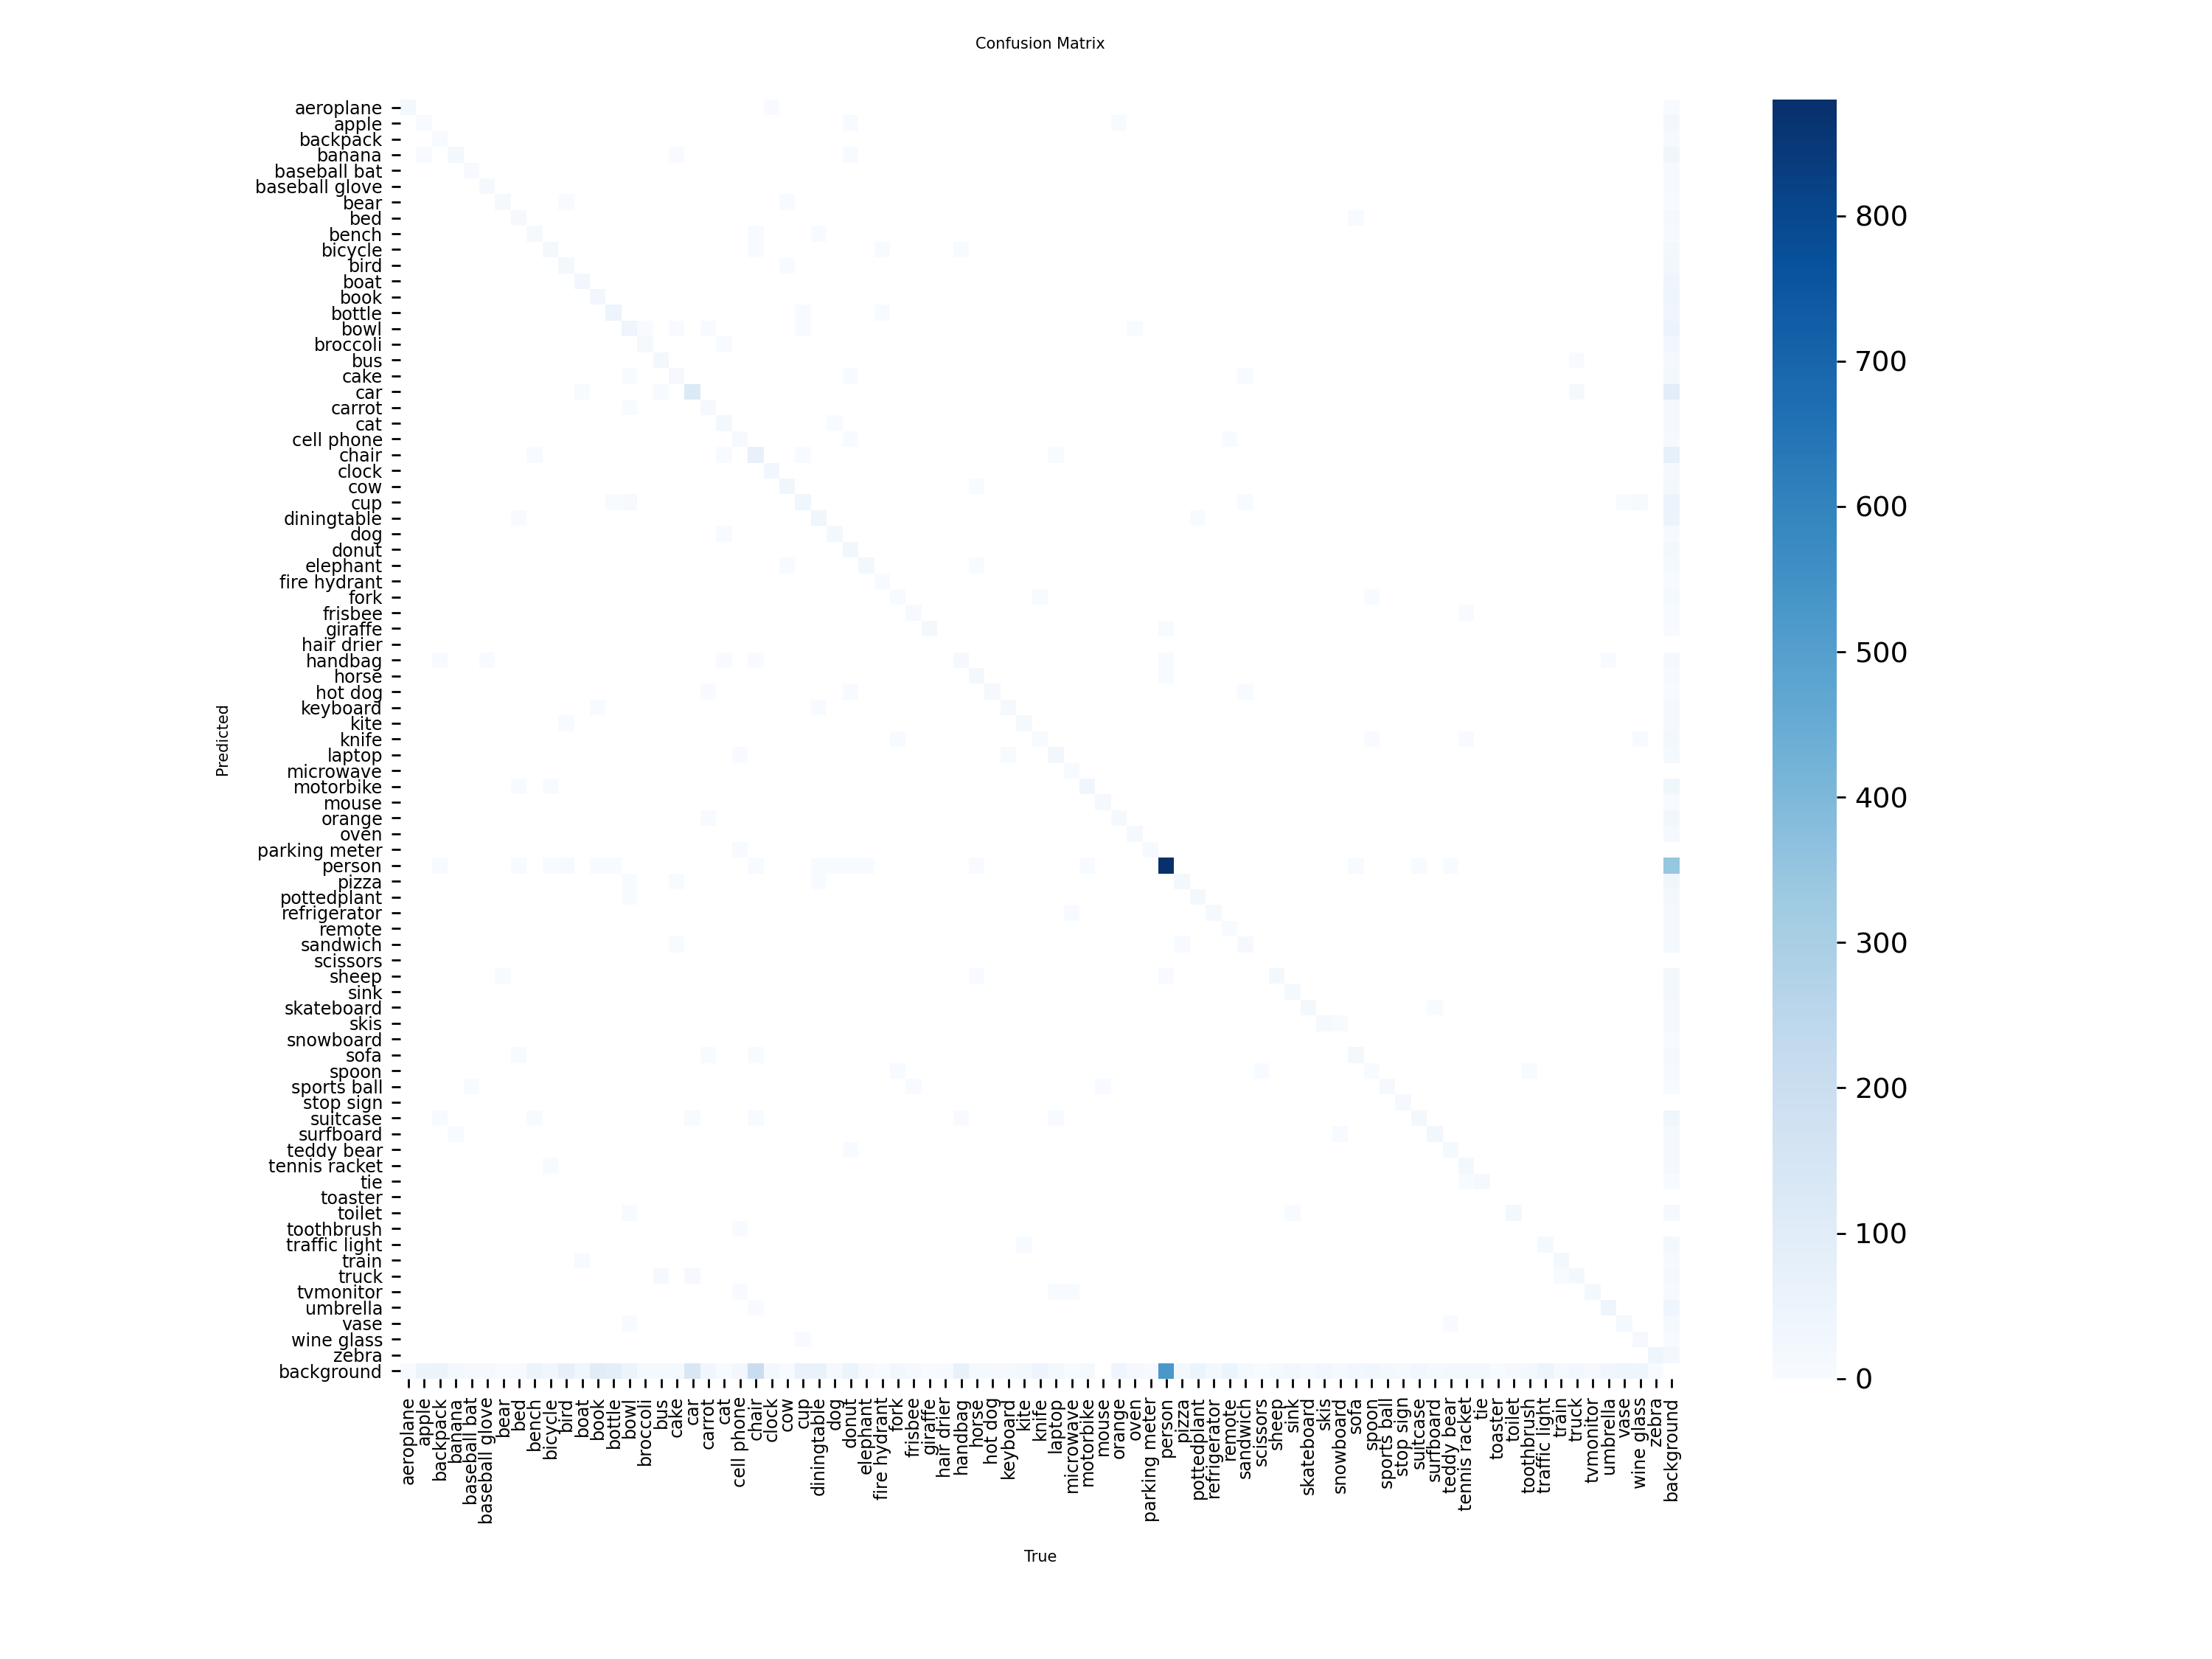

In [7]:
# Visualizar os resultados, listando os arquivos gerados
!ls runs/detect/train/

# Exibir a matriz de confusão
from IPython.display import Image
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

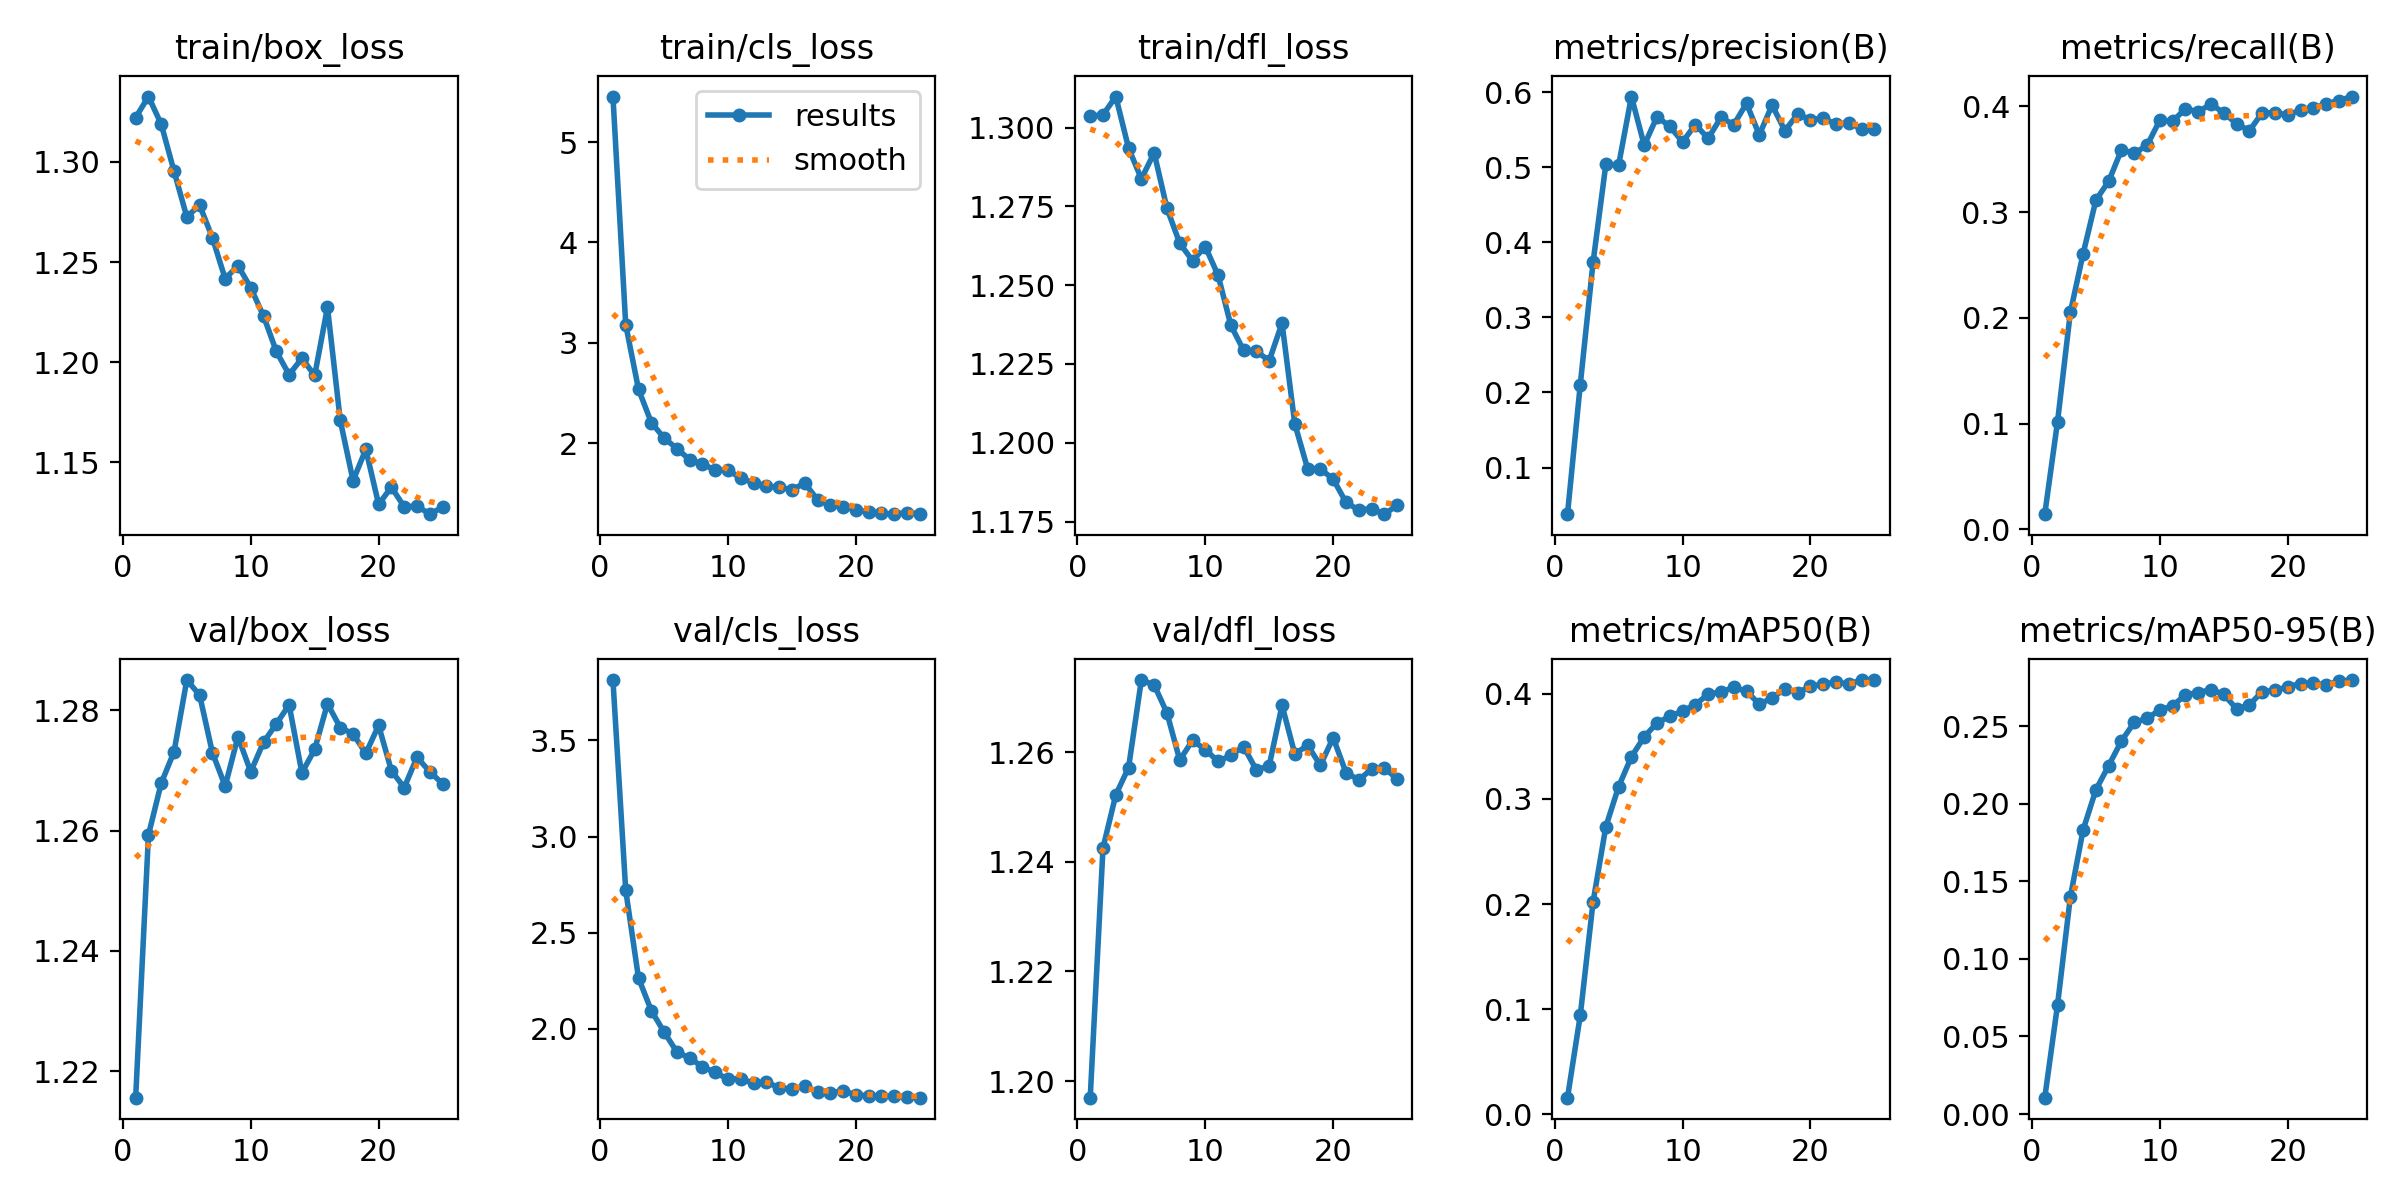

In [8]:
# Exibir as curvas de métricas (Precision-Recall, etc.)
Image(filename='runs/detect/train/results.png', width=800)


image 1/1 /content/minha_imagem_teste.jpg: 448x640 8 cars, 3 persons, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict_results
Exibindo imagem de resultado de: runs/detect/predict_results/minha_imagem_teste.jpg


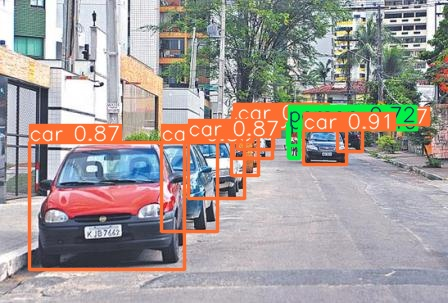

In [13]:
# Executando a Detecção em Novas Imagens
# Fazer a predição em uma imagem de teste
from ultralytics import YOLO
from IPython.display import Image
import os

# 1. Verificando o upload da imagem de teste
# (Ex: 'minha_imagem_teste.jpg')
imagem_teste_path = 'minha_imagem_teste.jpg'

# 2. Carregando o modelo treinado
# O caminho para o melhor modelo salvo durante o treinamento
model_path = 'runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# 3. Executando a predição com salvamento explícito
# Usei os argumentos 'project' e 'name' para controlar exatamente onde salvar
results = model.predict(
    source=imagem_teste_path,
    save=True,                # Garante que o resultado seja salvo
    project='runs/detect',    # Diretório base para os resultados
    name='predict_results',   # Nome da pasta específica para esta predição
    exist_ok=True             # Permite que a pasta seja reutilizada se já existir
)

# 4. Exibindo a imagem salva
# O caminho da imagem de resultado agora é previsível
caminho_resultado = f'runs/detect/predict_results/{os.path.basename(imagem_teste_path)}'

print(f"Exibindo imagem de resultado de: {caminho_resultado}")
display(Image(filename=caminho_resultado))